In [8]:
# Load the processed acts from the .pkl file
import pickle
with open("processed_acts.pkl", "rb") as f:
    processed_acts = pickle.load(f)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Both CountVectorizer and TfidfTransformer take lists of strings as arguments so we must join tokens back into full strings
tragedies_acts = [" ".join(tragedy_act["tokens"]) for tragedy_act in processed_acts]

# Now use with vectorizer + transformer
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(tragedies_acts) #Convert text to a matrix of token counts

transformer = TfidfTransformer(smooth_idf=False)
tfidf_rep = transformer.fit_transform(count_matrix) #Transform a count matrix to a normalized tf or tf-idf representation.

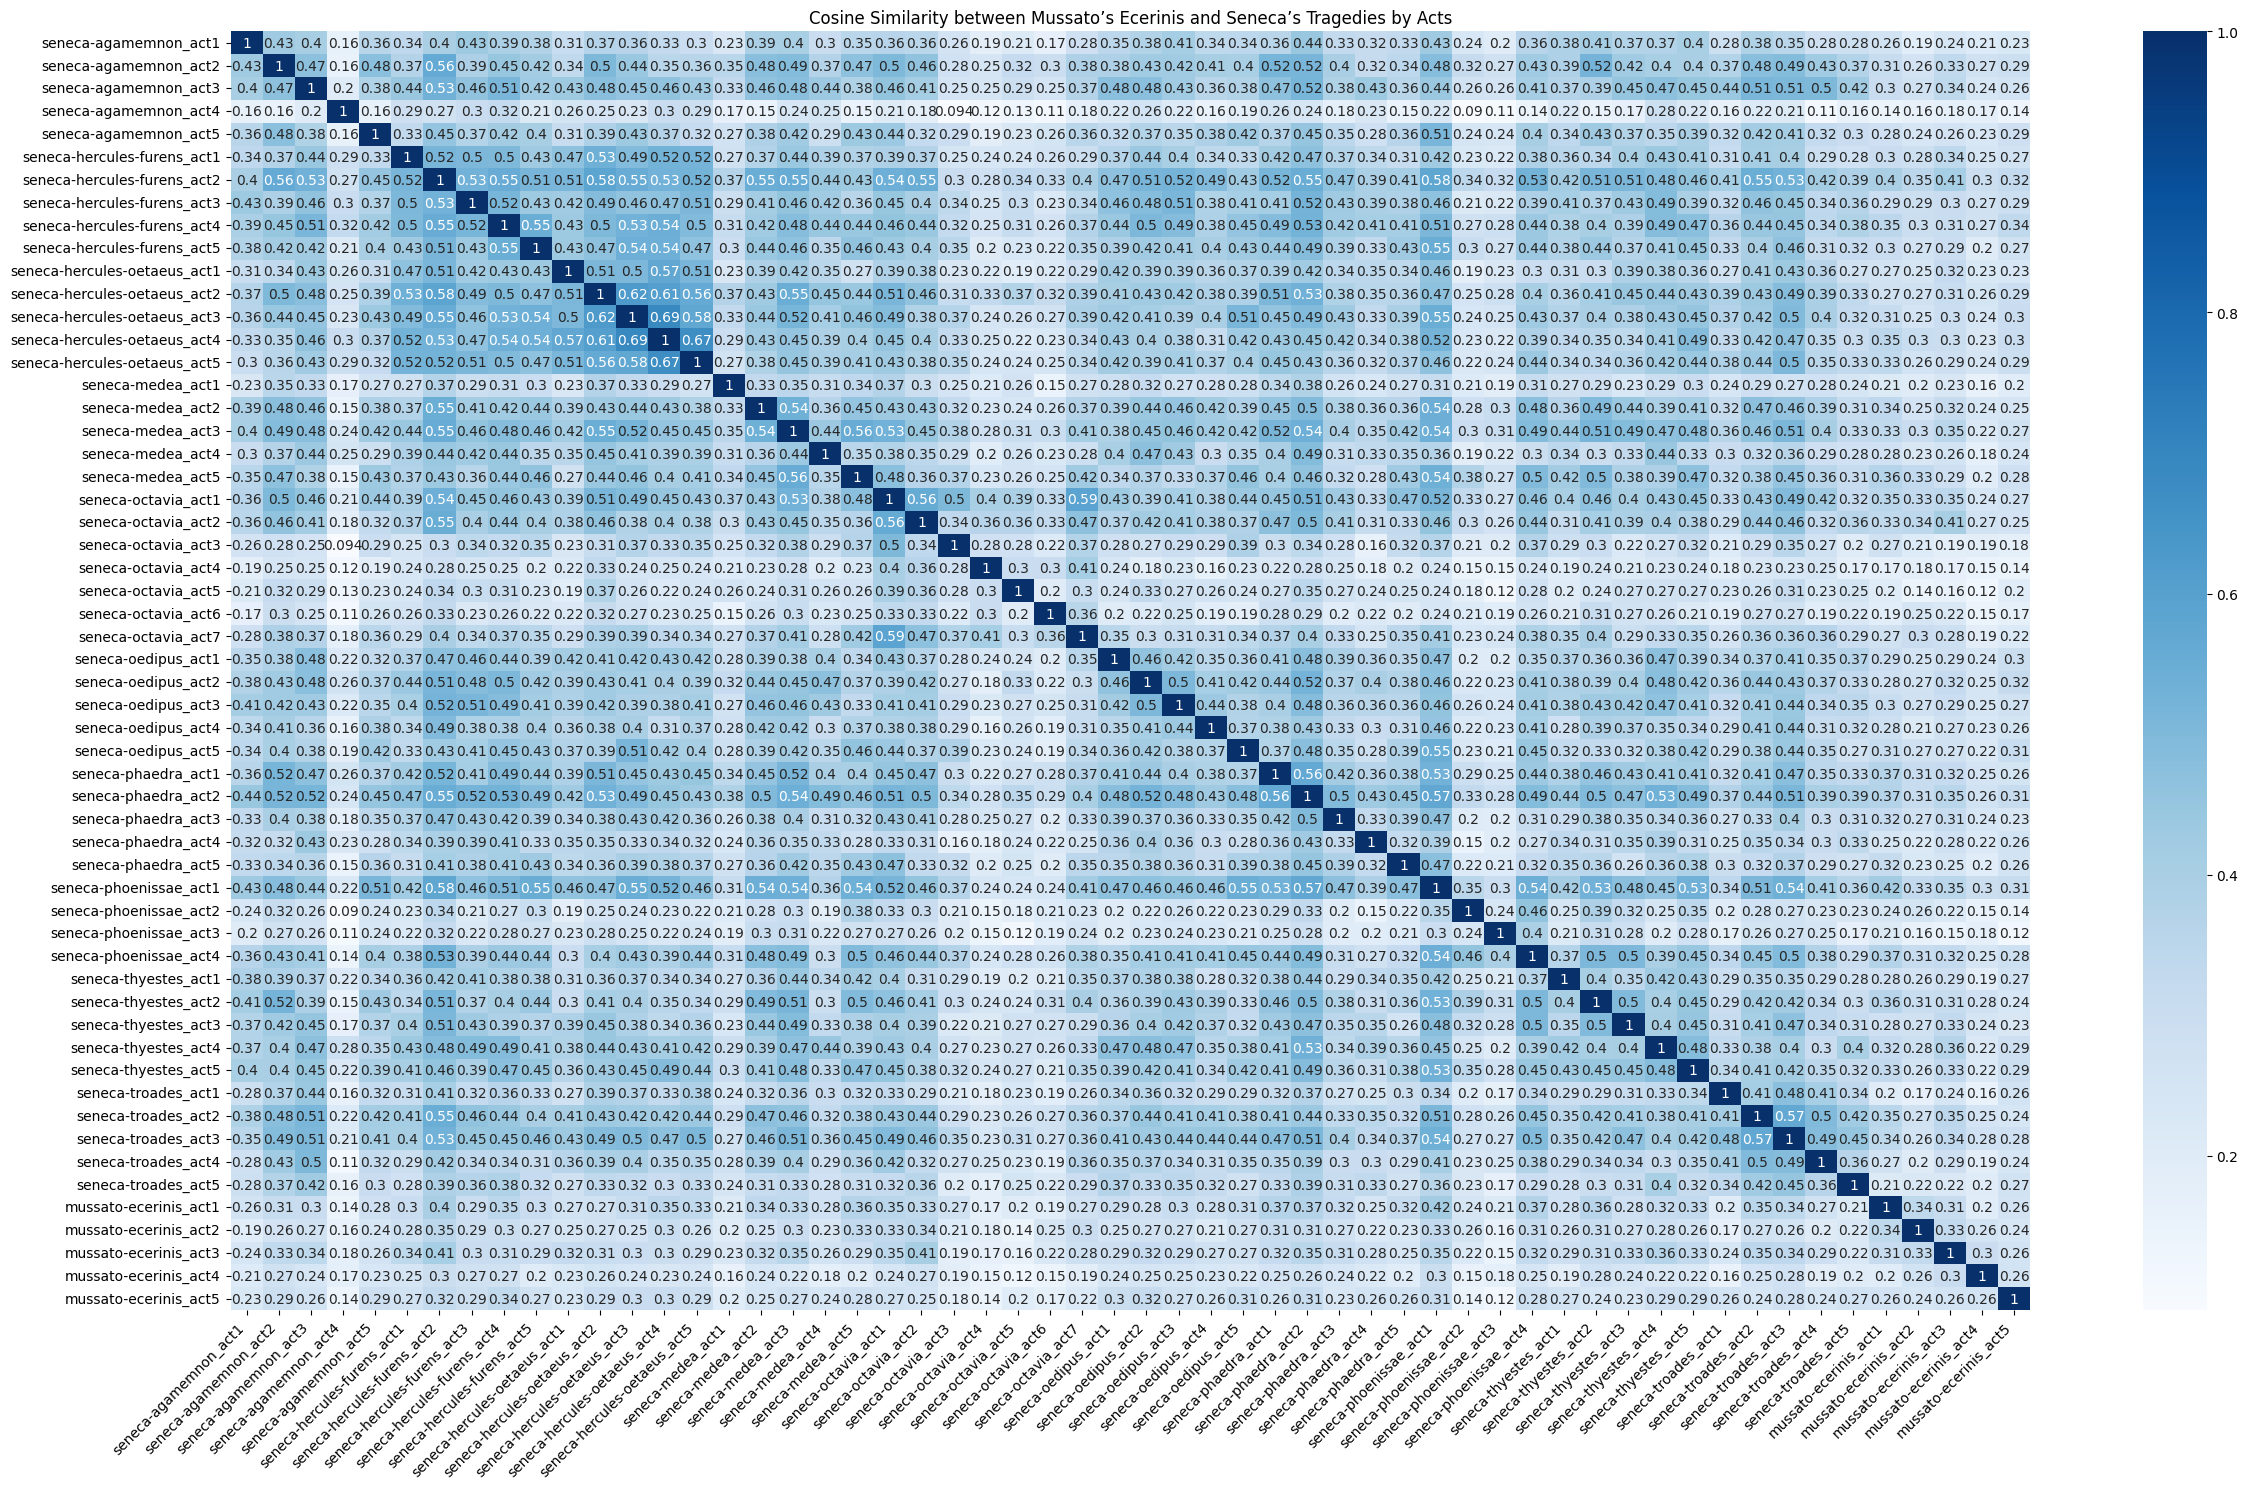

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
similarity_matrix = cosine_similarity(count_matrix) #calculating cosine similarity between texts

labels = [tragedy_act["id"] for tragedy_act in processed_acts] #labeling all plays by acts

# Plotting the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(similarity_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=True)
plt.title('Cosine Similarity between Mussato’s Ecerinis and Seneca’s Tragedies by Acts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("./figures/acts_cosine_similarity_heatmap.png", dpi=300)  # Save the figure
plt.show()

In [14]:
import numpy as np

# Identify Ecerinis acts by play_slug
ecerinis_indices = [i for i, act in enumerate(processed_acts) if act["play_slug"] == "mussato-ecerinis"]

for idx in ecerinis_indices:
    similarities = similarity_matrix[idx]
    # Exclude Ecerinis acts (including self)
    exclude_indices = set(ecerinis_indices)
    similarities_filtered = [(i, sim) for i, sim in enumerate(similarities) if i not in exclude_indices]
    # Get top 3
    top3 = sorted(similarities_filtered, key=lambda x: x[1], reverse=True)[:3]
    print(f"\nTop 3 similarities for Ecerinis Act {processed_acts[idx]['act']}")
    for i, sim in top3:
        act = processed_acts[i]
        print(f"  {act['title']}, Act: {act['act']}, Similarity={sim:.4f}")


Top 3 similarities for Ecerinis Act 1
  Phoenissae, Act: 1, Similarity=0.4184
  Hercules Furens, Act: 2, Similarity=0.3978
  Phoenissae, Act: 4, Similarity=0.3697

Top 3 similarities for Ecerinis Act 2
  Hercules Furens, Act: 2, Similarity=0.3490
  Octavia, Act: 2, Similarity=0.3437
  Phoenissae, Act: 1, Similarity=0.3316

Top 3 similarities for Ecerinis Act 3
  Hercules Furens, Act: 2, Similarity=0.4088
  Octavia, Act: 2, Similarity=0.4055
  Thyestes, Act: 4, Similarity=0.3640

Top 3 similarities for Ecerinis Act 4
  Phoenissae, Act: 1, Similarity=0.2994
  Hercules Furens, Act: 2, Similarity=0.2973
  Troades, Act: 3, Similarity=0.2781

Top 3 similarities for Ecerinis Act 5
  Hercules Furens, Act: 4, Similarity=0.3354
  Hercules Furens, Act: 2, Similarity=0.3245
  Oedipus, Act: 2, Similarity=0.3163
